<a href="https://colab.research.google.com/github/allexia1/aneel_analis/blob/main/Garantia_fisica_rl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [250]:
URI_TREINO = "https://raw.githubusercontent.com/allexia1/predicarnotas/master/Pasta1.csv"
URI_TESTE = "https://raw.githubusercontent.com/allexia1/aneel_analis/main/hidr.csv"
Y = pd.read_csv(URI_TREINO)
W = pd.read_csv(URI_TESTE)


In [218]:
#dados_treino.head()
Y



,Potência Outorgada (kW),Potência Fiscalizada (kW),Garantia Fisica (kW)
0,"1,300.50",1300.5,0
1,"1,600.00",0.0,1060
2,165.60,165.6,0
3,"2,056.00",2056.0,1100
4,831.00,831.0,360
...,...,...,...
162,100.00,100.0,0
163,990.00,990.0,0
164,"2,500.00",2500.0,0
165,990.00,990.0,0


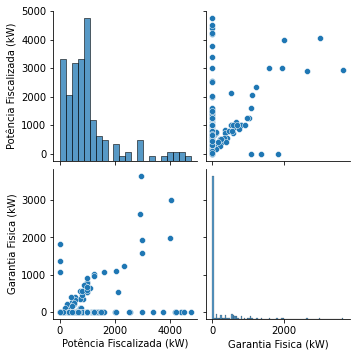

In [219]:

sns.pairplot(Y)



In [220]:
URI_TREINO1 = "https://raw.githubusercontent.com/allexia1/aneel_analis/main/Pasta1%20(1).csv"
X = pd.read_csv(URI_TREINO1)


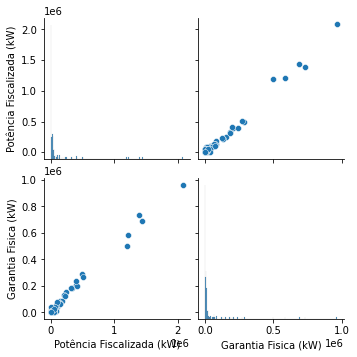

In [200]:
sns.pairplot(X)

In [251]:
W

,Potência Outorgada (kW),Potência Fiscalizada (kW),Garantia Fisica (kW)
0,1396200.0,1396200.0,731000
1,330000.0,330000.0,181900
2,1600.0,0.0,1060
3,240000.0,243675.0,154400
4,210000.0,210000.0,131700
...,...,...,...
162,800.0,800.0,0
163,1616.0,1616.0,0
164,1000.0,1000.0,0
165,3200.0,3200.0,0


In [245]:
 from sklearn.model_selection import train_test_split

In [203]:

x_t = Y[['Potência Fiscalizada (kW)']]



In [204]:
y_t = Y[['Garantia Fisica (kW)']]

In [205]:
train_test_split(x_t, y_t, test_size=0.4, random_state=10100000)

[     Potência Fiscalizada (kW)
 67                        16.0
 158                     1500.0
 134                        7.2
 102                      736.0
 100                     1260.0
 ..                         ...
 8                        940.0
 135                     4505.0
 71                       950.0
 130                      180.0
 129                      990.0
 
 [100 rows x 1 columns],      Potência Fiscalizada (kW)
 57                      1000.0
 66                        12.0
 36                       910.0
 0                       1300.5
 154                      988.8
 ..                         ...
 22                         7.2
 62                       500.0
 146                     1600.0
 74                      4230.0
 9                        999.0
 
 [67 rows x 1 columns],      Garantia Fisica (kW)
 67                      0
 158                     0
 134                     0
 102                     0
 100                     0
 ..                

In [206]:
from sklearn.linear_model import LinearRegression

In [207]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [208]:
lr.fit(x_t, y_t)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [209]:

print(lr.intercept_)

[28.44135591]


In [210]:
print(lr.coef_)

[[0.1977895]]


In [252]:
x_teste= W[['Potência Fiscalizada (kW)']]

In [253]:
y_teste = W[['Garantia Fisica (kW)']]

In [254]:

predict = lr.predict(y_t)
predictions = lr.predict( x_t)

In [255]:
predict


array([[ 28.44135591],
       [238.09822996],
       [ 28.44135591],
       [246.00981011],
       [ 99.64557729],
       [ 28.44135591],
       [186.67295897],
       [ 28.44135591],
       [ 28.44135591],
       [ 28.44135591],
       [ 28.44135591],
       [ 97.66768225],
       [ 28.44135591],
       [147.1150582 ],
       [ 54.15399141],
       [ 28.44135591],
       [ 28.44135591],
       [ 28.44135591],
       [ 79.86662691],
       [ 28.44135591],
       [548.62775095],
       [ 28.44135591],
       [ 28.44135591],
       [ 28.44135591],
       [ 28.44135591],
       [ 28.44135591],
       [ 42.28662118],
       [ 28.44135591],
       [ 28.44135591],
       [269.74455057],
       [155.02663836],
       [ 28.44135591],
       [ 28.44135591],
       [ 28.44135591],
       [ 28.44135591],
       [228.20875477],
       [ 28.44135591],
       [ 28.44135591],
       [107.55715744],
       [ 28.44135591],
       [420.06457347],
       [ 28.44135591],
       [ 28.44135591],
       [ 28

In [257]:

lr.fit(x_teste, y_teste)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


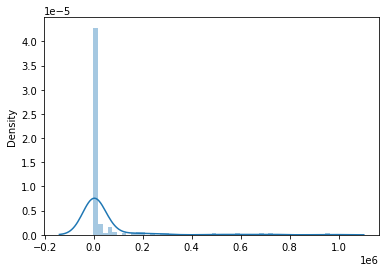

In [261]:
sns.distplot((y_teste-predict))

In [259]:
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_teste, predict) )



MSE 17846016809.892105
